1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



In [1]:
import numpy as np

#Load the dataset
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0] #21 years
years = np.arange(1,years_nb+1) #array of years from 1 to 21

#Compute then the cumulative probability p_i = i/(N+1), with N=21
cprob = years/(years_nb+1)

#Sort the maximum speeds from the data
sorted_max_speeds = np.sort(max_speeds)

#Define a quantile function 
from scipy.interpolate import UnivariateSpline

quantile_function = UnivariateSpline(cprob, sorted_max_speeds)

#Estimate the probabilities (We know that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile)
fifty_prob = 1. - 0.02
fifty_wind = quantile_function(fifty_prob)
print("Storm wind speed occuring every 50 years is guessed as: ",fifty_wind)

Storm wind speed occuring every 50 years is guessed as:  32.97989844019469


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

<ipython-input-2-f298c690aba4>:22: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return c*exp(-(x-mu)**2/(2*sigma**2))


Time offset for min temperatures (blue vertical line): 7.100000000000005
Time offset for max temperatures (red vertical line): 6.700000000000005


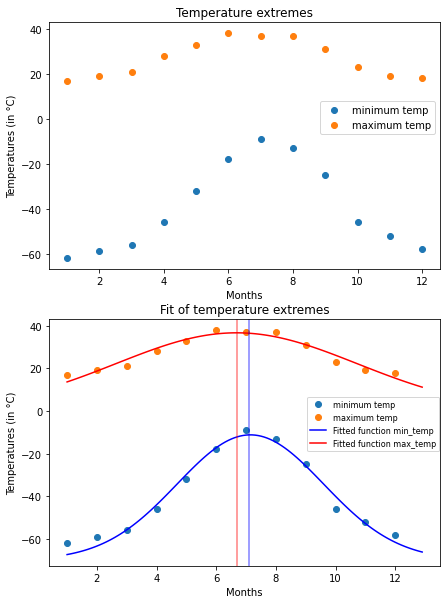

In [2]:
#1) Plot of the temperature extremes
import matplotlib.pyplot as plt

max_temp = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_temp = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months = np.arange(1,13,1) #12 months 

fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1,figsize=(7,10))

ax1.plot(months, min_temp, 'o', label='minimum temp')
ax1.plot(months, max_temp, 'o', label='maximum temp')
ax1.legend(loc='best', bbox_to_anchor=(1,0.7))
ax1.set_xlabel('Months')
ax1.set_ylabel('Temperatures (in °C)')
ax1.set_title('Temperature extremes')

#2) Define a function that can describe min and max temperatures
from scipy import optimize,exp

#The previous plot looks like a Gaussian Distribution. So we define a Gaussian function to describe temperatures
def gauss(x,c,mu,sigma):
    return c*exp(-(x-mu)**2/(2*sigma**2))

#3) Fit the function 'gauss' to the data

param_max_temp, pcov = optimize.curve_fit(gauss, months, max_temp)

#Using a Gaussian function to curve fit with negative values (since the min temperatures are negative values) 
#gives us an error message. So, we decided to scale these values by 70 to make all of them positive. 

min_temp_shift = min_temp + 70
param_min_temp_shift, pcov = optimize.curve_fit(gauss, months, min_temp_shift)

#4) Plot the result
x = np.arange(1,13,0.1)

y_max_temp = gauss(x, param_max_temp[0], param_max_temp[1], param_max_temp[2])
#We rescale the min temperature back to the original values
y_min_temp = gauss(x, param_min_temp_shift[0], param_min_temp_shift[1], param_min_temp_shift[2])-70

ax2.plot(months, min_temp, 'o', label='minimum temp')
ax2.plot(months, max_temp, 'o', label='maximum temp')

ax2.set_xlabel('Months')
ax2.set_ylabel('Temperatures (in °C)')
ax2.plot(x, y_min_temp, label='Fitted function min_temp',color='b')
ax2.plot(x, y_max_temp, label='Fitted function max_temp',color='r')
ax2.legend(loc='best', bbox_to_anchor=(0.65,0.7),prop={'size': 8})
ax2.set_title('Fit of temperature extremes')

#Using a Gaussian function for curve fitting not hold to the same result for both min_temp and max_temp curve fitting

#5) Is the time offset for min and max temperatures the same within the fit accuracy?
ax2.axvline(x[np.argmax(y_min_temp)],color="b",alpha=0.5)
ax2.axvline(x[np.argmax(y_max_temp)],color="r",alpha=0.5)

offset_min = x[np.argmax(y_min_temp)]
offset_max = x[np.argmax(y_max_temp)]

print('Time offset for min temperatures (blue vertical line):',offset_min)
print('Time offset for max temperatures (red vertical line):',offset_max)
#The time offset for min and max temperatures are not same within the fit accuracy

3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


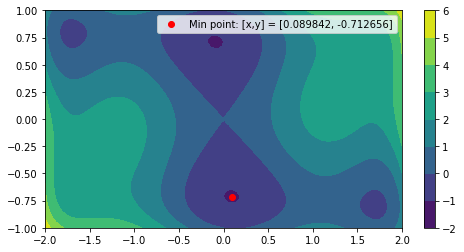


Initial guess: x1 = [1.0, 1.0]
global minimum: x = [0.0898, -0.7127], f(x1) = -1.0316

Initial guess: x0 = [0, 0]
global minimum: x = [0.0898, -0.7127], f(x0) = -1.0316


In [12]:
#Restrict variables to −2<x<2 and −1<y<1
x = np.linspace(-2,2,100)
y = np.linspace(-1,1,100)

#Find visually the regions
X,Y = np.meshgrid(x,y)

#In 'my_function' I use x=x[0] and y=x[1] for simplicity
def my_function(x):
    f = ((4 -2.1*x[0]*x[0] + ((x[0]**4)/3))*x[0]**2) + x[0]*x[1] + (4*x[1]**2 - 4)*x[1]**2
    df = np.zeros(2)
    df[0] = 8*x[0] - 4*2.1*x[0]**3 + 2*x[0]**5 + x[1] #differentiation wrt to x
    df[1] = x[0] + 16*x[1]**3 - 8*x[1] #differentiation wrt to y
    return f, df

x1 = [1.0,1.0] #initial values for x_min and y_min

from scipy.optimize import basinhopping
#This function returns values of x and y where the function is minimum and
#the value of the function (my_function) at the given (x,y)=min(f(x,y))
sol1 = basinhopping(my_function, x1, minimizer_kwargs={"method":"L-BFGS-B", "jac":True}, niter=200)

fig, ax = plt.subplots(figsize=(8, 4))

def f(x,y):
    return ((4 -2.1*x*x + ((x**4)/3))*x**2) + x*y + (4*y**2 - 4)*y**2

contourmap = ax.contourf(x,y,f(X,Y))
fig.colorbar(contourmap)
ax.plot(sol1.x[0], sol1.x[1],'ro',label="Min point: [x,y] = [%f, %f]"%(sol1.x[0],sol1.x[1]))
plt.legend()
plt.show()
#plt.imshow(fun)

#Global minimum

print('\nInitial guess: x1 =',x1)
print("global minimum: x = [%.4f, %.4f], f(x1) = %.4f" % (sol1.x[0], sol1.x[1], sol1.fun))

#initial guess of x0=[0,0]
x0=[0,0]
sol2 = basinhopping(my_function, x0, minimizer_kwargs={"method":"L-BFGS-B", "jac":True}, niter=200)
print('\nInitial guess: x0 =',x0)
print("global minimum: x = [%.4f, %.4f], f(x0) = %.4f" % (sol2.x[0], sol2.x[1], sol2.fun))

#The two results of global minimum differ only in sign but remains same for the function value.

4\. **FFT of a simple dataset**

Performe a periodicity analysis on the lynxs-hares population

<ipython-input-24-dfcefa2042dc>:28: RuntimeWarning: divide by zero encountered in true_divide
  periods = 1 / sample_freq


Text(0.5, 1.0, 'FFT power')

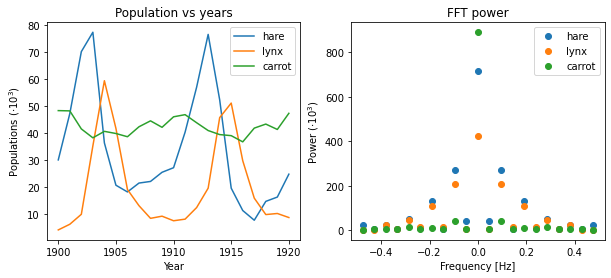

In [24]:
# Loading the data of populations
data = np.loadtxt('populations.txt')
years = data[:, 0]
populations = data[:, 1:] #years,hares,lynx,carrot

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# plot of population vs years 
ax1.plot(years, populations * 1e-3)
ax1.set_xlabel('Year')
ax1.set_ylabel('Populations ($\cdot10^3$)')
ax1.legend(['hare', 'lynx', 'carrot'], loc=1)
ax1.set_title('Population vs years')

#Fast fourier Transform of the populations
from scipy import fftpack

# The FFT of the populations
populations_fft = fftpack.fft(populations, axis=0)

# The power
power = np.abs(populations_fft)

# The corresponding frequencies
n = populations.shape[0] #Window length.
time_step = years[1] - years[0]  
sample_freq = fftpack.fftfreq(n,time_step)
periods = 1 / sample_freq

# Plot the FFT power
ax2.plot(sample_freq, power* 1e-3, 'o')
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Power ($\cdot10^3$)')
ax2.legend(['hare', 'lynx', 'carrot'], loc=1)
ax2.set_title('FFT power')


5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

Text(0.5, 1.0, 'Reconstructed Image')

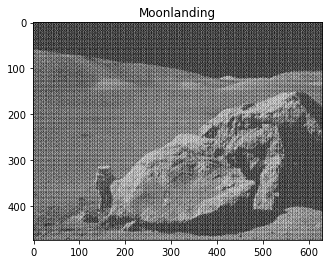

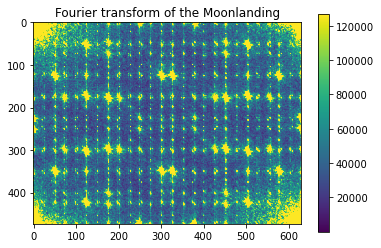

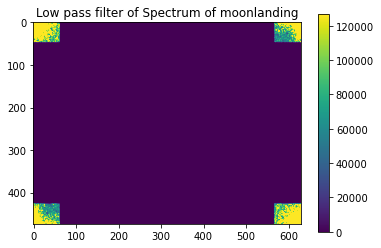

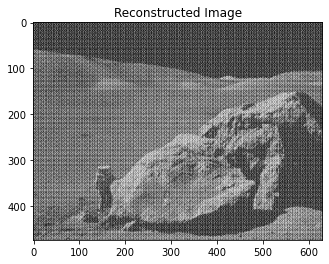

In [32]:
#1) Load the image
moon = plt.imread("moonlanding.png").astype(float)
plt.figure(0)
plt.imshow(moon,plt.cm.gray)
plt.title("Moonlanding") #there is noise

#2) Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image
import matplotlib.colors
from matplotlib.colors import Normalize

#2D fourier transform 
moon_FFT = fftpack.fft2(moon)
moon_power = abs(moon_FFT)

max_value = 100 #max value of data takes when normalized from 0 to 100 
norm = matplotlib.colors.Normalize(vmax=max_value)
plt.figure(1)
img = plt.imshow(moon_power); 
img_norm = plt.imshow(moon_power, norm=norm)
plt.colorbar(img)
plt.title("Fourier transform of the Moonlanding")

#The spectrum image normalized is clear. So we can remove the higher values of power spectrum

#3) Remove noise
#To remove the noise we construct a low pass filter that we use to remove the central portion of the power spectrum. 

#Copy of the power
moon_power1 = moon_power.copy()

rows, cols = moon_power1.shape

#we cut-off the middle square part of the spectrum by making them 0 (We keep only the first few rows and first few columns)
K = 0.1 #to keep

#Middle rows and columns = 0
moon_power1[int(rows*K):int(rows*(1-K))] = 0
moon_power1[:, int(cols*K):int(cols*(1-K))] = 0

plt.figure(2)
img1 = plt.imshow(moon_power1); 
img_norm1 = plt.imshow(moon_power1, norm=norm)
plt.colorbar(img1)
plt.title("Low pass filter of Spectrum of moonlanding")


#4) Apply the inverse Fourier transform to see the resulting image
moon_FFT1 = moon_FFT.copy()
zero_index = np.argwhere(moon_FFT1==0)

for i,j in zero_index:
    moon_FFT1[i,j] = 0

    
img2 = fftpack.ifft2(moon_FFT1).real

plt.figure(3)
plt.imshow(img2, plt.cm.gray)
plt.title('Reconstructed Image')
